In [128]:
import numpy as np
import matplotlib.pyplot as plt

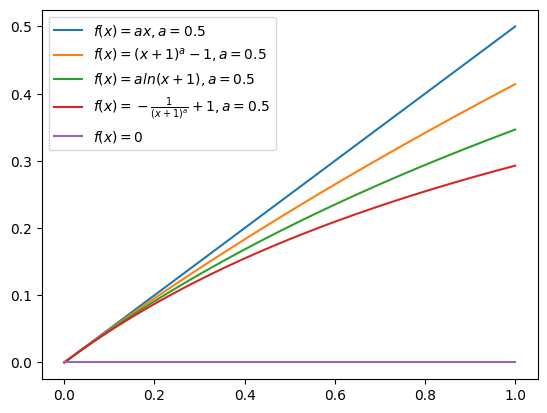

In [129]:
x = np.linspace(0, 1, 1000)
y1 = 0.5*x
y2 = (x + 1)**0.5 - 1
y3 = 0.5*np.log(x + 1)
y4 = -1/(x + 1)**0.5 + 1
y5 = x*0
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.legend([r'${f(x)=ax,a=0.5}$', r'${f(x)=(x+1)^a-1,a=0.5}$', r'${f(x)=aln(x+1),a=0.5}$', r'${f(x)=-\frac{1}{(x+1)^a} +1,a=0.5}$', r'${f(x)=0}$'])

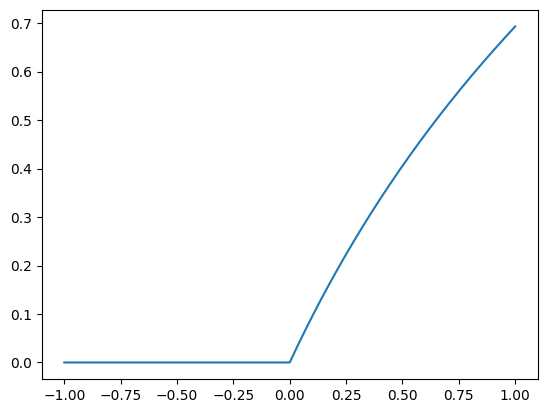

In [130]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
y[x >= 0] = np.log(x[x >= 0] + 1)
plt.plot(x, y)

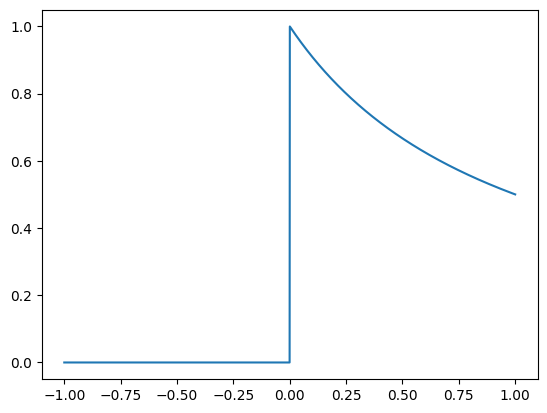

In [131]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
y[x >= 0] = 1/(x[x >= 0] + 1)
plt.plot(x, y)

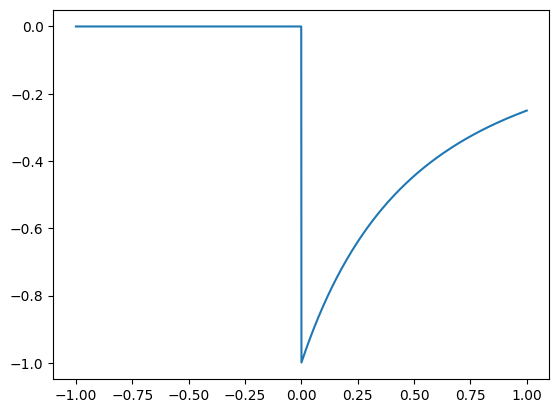

In [132]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
y[x >= 0] = -1/(x[x >= 0] + 1)**2
plt.plot(x, y)

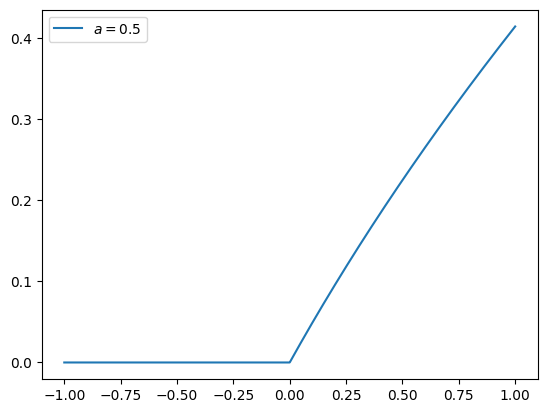

In [133]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
a = 0.5
y[x >= 0] = (x[x >= 0] + 1)**a - 1
plt.plot(x, y)
plt.legend([r"${a=0.5}$"])

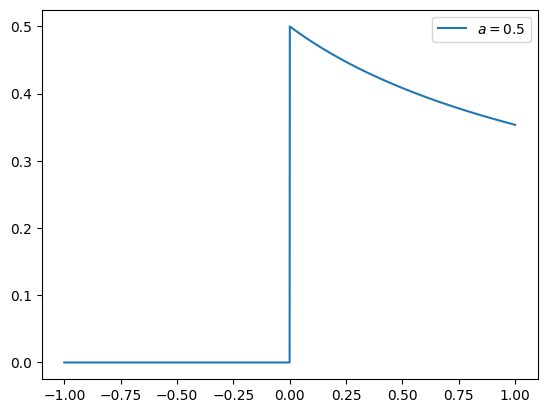

In [134]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
a = 0.5
y[x >= 0] = a/(x[x >= 0] + 1)**(1 - a)
plt.plot(x, y)
plt.legend([r"${a=0.5}$"])

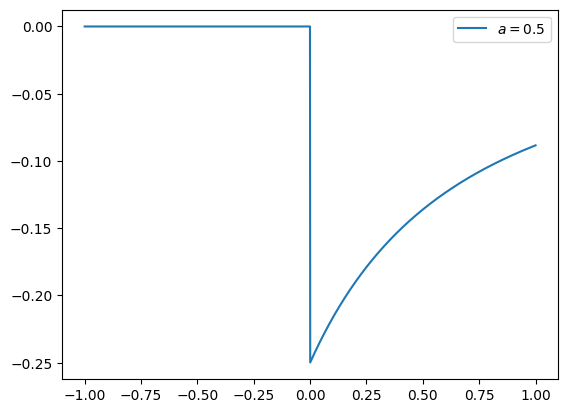

In [135]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
a = 0.5
y[x >= 0] = -a*(1 - a)/(x[x >= 0] + 1)**(2 - a)
plt.plot(x, y)
plt.legend([r"${a=0.5}$"])

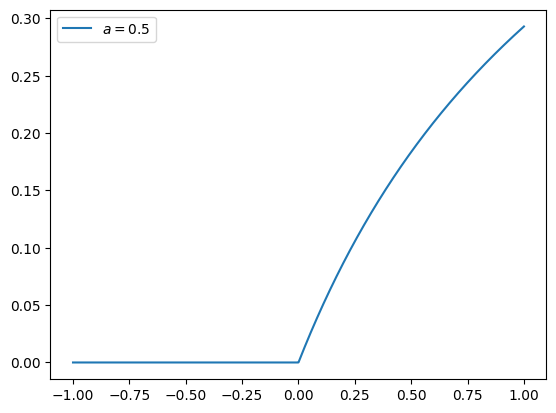

In [136]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
a = 0.5
y[x >= 0] = -1/(x[x >= 0] + 1)**a + 1
plt.plot(x, y)
plt.legend([r"${a=0.5}$"])

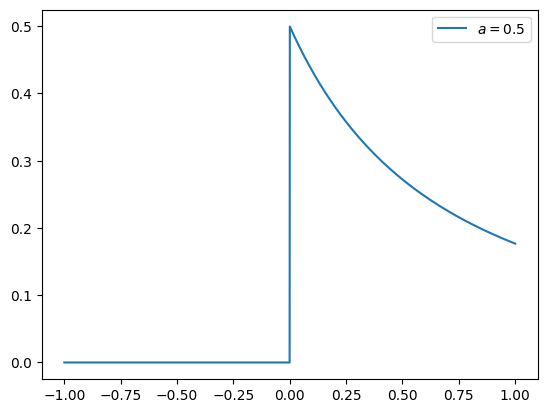

In [137]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
a = 0.5
y[x >= 0] = a/(x[x >= 0] + 1)**(a + 1)
plt.plot(x, y)
plt.legend([r"${a=0.5}$"])

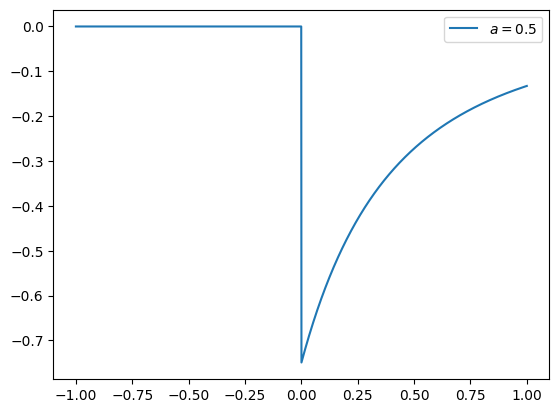

In [138]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
a = 0.5
y[x >= 0] = -a*(a + 1)/(x[x >= 0] + 1)**(a + 2)
plt.plot(x, y)
plt.legend([r"${a=0.5}$"])

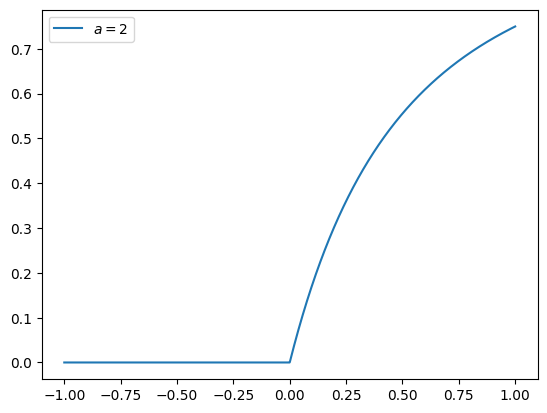

In [139]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
a = 2
y[x >= 0] = -1/(x[x >= 0] + 1)**a + 1
plt.plot(x, y)
plt.legend([r"${a=2}$"])

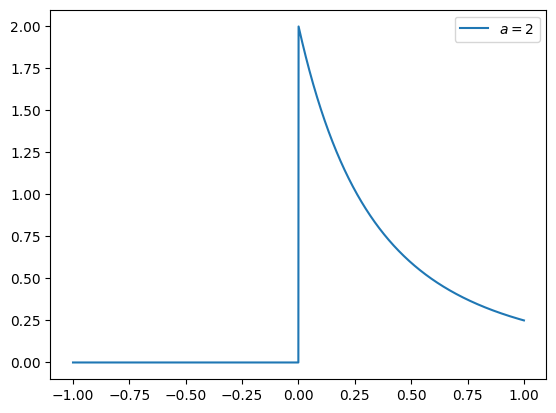

In [140]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
a = 2
y[x >= 0] = a/(x[x >= 0] + 1)**(a + 1)
plt.plot(x, y)
plt.legend([r"${a=2}$"])

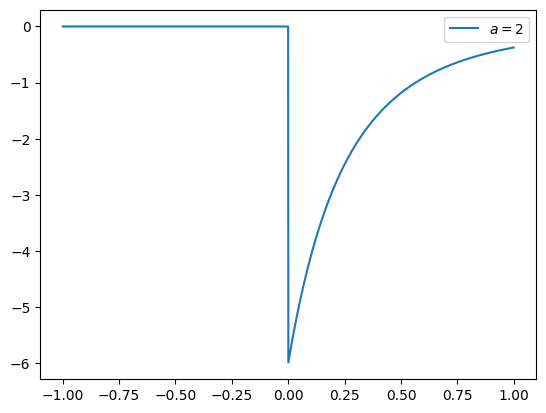

In [141]:
x = np.linspace(-1, 1, 2000)
y = np.zeros_like(x)
a = 2
y[x >= 0] = -a*(a + 1)/(x[x >= 0] + 1)**(a + 2)
plt.plot(x, y)
plt.legend([r"${a=2}$"])

In [1]:
import torch
from torch import nn

In [10]:
n = 10000
X = torch.linspace(0, 100, n).reshape(-1, 1)
Y = torch.log(X + 1) + 0.1*torch.randn(n).reshape(-1, 1)

torch.Size([10000, 1])

In [5]:
class RecuNet(nn.Module):

    def __init__(self):
        super(RecuNet, self).__init__()
        w1 = torch.randn((1, 10))
        self.w1 = nn.Parameter(w1)
        self.register_parameter("w1", self.w1)
        b1 = torch.randn(10)
        self.b1 = nn.Parameter(b1)
        self.register_parameter("b1", self.b1)
        w2 = torch.randn((10, 20))
        self.w2 = nn.Parameter(w2)
        self.register_parameter("w2", self.w2)
        b2 = torch.randn(20)
        self.b2 = nn.Parameter(b2)
        self.register_parameter("b2", self.b2)
        w3 = torch.randn((20, 10))
        self.w3 = nn.Parameter(w3)
        self.register_parameter("w3", self.w3)
        b3 = torch.randn(10)
        self.b3 = nn.Parameter(b3)
        self.register_parameter("b3", self.b3)
        w4 = torch.randn((10, 1))
        self.w4 = nn.Parameter(w4)
        self.register_parameter("w4", self.w4)
        b4 = torch.randn(1)
        self.b4 = nn.Parameter(b4)
        self.register_parameter("b4", self.b4)
        
    def forward(self, x):
        x1 = self.recu(x@self.w1 + self.b1)
        x2  = self.recu(x1@self.w2 + self.b2)
        x3 = self.recu(x2@self.w3 + self.b3)
        x4 = self.recu(x3@self.w4 + self.b4)
        return x4

    def recu(self, x):
        return x - torch.log(torch.exp(x) + 1)

In [6]:
recu_net = RecuNet()

#优化器
learning_rate = 0.01
optimizer = torch.optim.SGD(recu_net.parameters(), lr=learning_rate)

#训练轮数
epoch = 10
for i in range(epoch):

	#训练
    recu_net.train()
    for i in range(len(Y)):
        x = X[i]
        y = Y[i]
        y_pred = recu_net(x)
        loss = (y - y_pred)
        #梯度清零
        optimizer.zero_grad()
        #误差反向传播
        loss.backward()
        #参数更新
        optimizer.step()


In [9]:
Y_pred = torch.empty((n, 1))
Y_pred.shape

torch.Size([10000, 1])

In [11]:
Y_pred = torch.empty(n, 1)
for i in range(X.size()[0]):
    y = recu_net(X[i])
    #Y_pred[i, 1] = y
    print(y)

tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan], grad_fn=<SubBackward0>)
tensor([nan]

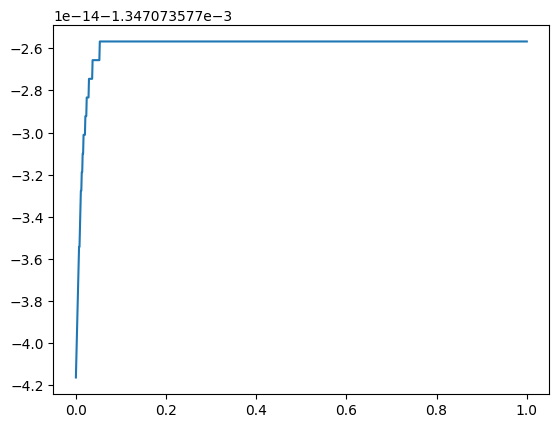

In [ ]:
def recu(x):
    w = 100*np.random.random()
    b = 100*np.random.random()
    x = w*x + b
    return x - np.log(np.exp(x) + 1)

x = np.linspace(0, 1, 1000)
y = recu(recu(x))
plt.plot(x, y)